## Loading Data

In [72]:
import pandas as pd

csv_path = "../../data/loan-10k.lrn.csv"

df = pd.read_csv(csv_path)
df.head()

,ID,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,...,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year,grade
0,24341,12500.0,12500.0,12500.0,36 months,7.21,387.17,< 1 year,MORTGAGE,81000.0,...,N,6,2018,6,2000,2,2019,2,2019,A
1,67534,33850.0,33850.0,33775.0,60 months,20.99,915.57,1 year,MORTGAGE,80000.0,...,N,10,2015,9,1984,2,2019,2,2019,E
2,35080,10000.0,10000.0,10000.0,60 months,20.00,264.94,< 1 year,RENT,36580.0,...,N,9,2017,10,2006,1,2018,11,2018,D
3,4828,20250.0,20250.0,20250.0,36 months,14.31,695.15,9 years,RENT,48700.0,...,N,0,2015,6,1996,6,2016,9,2017,C
4,59259,25000.0,25000.0,25000.0,36 months,14.99,866.52,1 year,MORTGAGE,85000.0,...,N,11,2016,0,2002,2,2019,2,2019,C


## Preprocessing

Checking missing values

In [73]:
missing_counts = df.isna().sum()
print("Total missing values:", int(missing_counts.sum()))

Total missing values: 0


Encoding column grade to numerical values: A = 0, B = 1, C = 2, D = 3, E = 4

In [74]:
import numpy as np
import pandas as pd

vals = df['grade'].astype('string')
print([repr(v) for v in vals.unique().tolist()]) 

["'A'", "'E'", "'D'", "'C'", "'B'", "'G'", "'F'"]


In [75]:
import pandas as pd

clean = (df['grade']            
         .str.strip()                     
         .str.replace(r'["\']', '', regex=True) 
         .str.replace(r'\s+', '', regex=True)    
         .str.extract(r'([A-G])', expand=False)  
         .str.upper())

mapping = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6}
df['grade'] = clean.map(mapping)
df.head()


,ID,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,...,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year,grade
0,24341,12500.0,12500.0,12500.0,36 months,7.21,387.17,< 1 year,MORTGAGE,81000.0,...,N,6,2018,6,2000,2,2019,2,2019,0
1,67534,33850.0,33850.0,33775.0,60 months,20.99,915.57,1 year,MORTGAGE,80000.0,...,N,10,2015,9,1984,2,2019,2,2019,4
2,35080,10000.0,10000.0,10000.0,60 months,20.00,264.94,< 1 year,RENT,36580.0,...,N,9,2017,10,2006,1,2018,11,2018,3
3,4828,20250.0,20250.0,20250.0,36 months,14.31,695.15,9 years,RENT,48700.0,...,N,0,2015,6,1996,6,2016,9,2017,2
4,59259,25000.0,25000.0,25000.0,36 months,14.99,866.52,1 year,MORTGAGE,85000.0,...,N,11,2016,0,2002,2,2019,2,2019,2


Checking the distribution of the target grade

In [76]:
df["grade"].value_counts(), df["grade"].value_counts(normalize=True)

(grade
 2    2989
 1    2881
 0    1821
 3    1449
 4     621
 5     182
 6      57
 Name: count, dtype: int64,
 grade
 2    0.2989
 1    0.2881
 0    0.1821
 3    0.1449
 4    0.0621
 5    0.0182
 6    0.0057
 Name: proportion, dtype: float64)

Check what data types the attributes are

In [77]:
pd.set_option('display.max_rows', None)
df.dtypes


ID                              int64
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
loan_status                    object
pymnt_plan                     object
purpose                        object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
fico_range_low                float64
fico_range_high               float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
initial_list_status            object
out_prncp   

In [ ]:

print("\nUnique values term:")
print(df['term'].unique())

print("\nUnique values emp_length:")
print(df['emp_length'].unique())

print("\nUnique values home_ownership:")
print(df['home_ownership'].unique())

print("\nUnique values loan_status:")
print(df['loan_status'].unique())

print("\nUnique values pymnt_plan:")
print(df['pymnt_plan'].unique())

print("\nUnique values purpose:")
print(df['purpose'].unique())

print("\nUnique values addr_state:")
print(df['addr_state'].unique())

print("\nUnique values initial_list_status:")
print(df['initial_list_status'].unique())

print("\nUnique values application_type:")
print(df['application_type'].unique())

print("\nUnique values hardship_flag:")
print(df['hardship_flag'].unique())

print("\nUnique values disbursement_method:")
print(df['disbursement_method'].unique())

print("\nUnique values debt_settlement_flag:")
print(df['debt_settlement_flag'].unique())

print("\nUnique values verification_status:")
print(df['verification_status'].unique())


Unique values term:
[' 36 months' ' 60 months']

Unique values emp_length:
['< 1 year' '1 year' '9 years' '10+ years' '3 years' '4 years' '7 years'
 '2 years' '5 years' '6 years' '8 years']

Unique values home_ownership:
['MORTGAGE' 'RENT' 'OWN' 'ANY' 'OTHER']

Unique values loan_status:
['Current' 'Fully Paid' 'Charged Off' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)']

Unique values pymnt_plan:
['n' 'y']

Unique values purpose:
['debt_consolidation' 'car' 'credit_card' 'other' 'major_purchase'
 'home_improvement' 'small_business' 'medical' 'vacation' 'moving' 'house'
 'renewable_energy' 'wedding']

Unique values addr_state:
['IL' 'OK' 'AZ' 'CA' 'FL' 'TX' 'PA' 'MA' 'NC' 'NV' 'SC' 'GA' 'NY' 'OR'
 'AL' 'VT' 'MD' 'KY' 'CO' 'IN' 'LA' 'MN' 'MI' 'WA' 'NJ' 'VA' 'WI' 'OH'
 'TN' 'CT' 'DC' 'HI' 'MO' 'DE' 'AR' 'KS' 'ME' 'MS' 'NM' 'AK' 'UT' 'WV'
 'MT' 'NH' 'SD' 'ID' 'NE' 'WY' 'ND' 'RI']

Unique values initial_list_status:
['w' 'f']

Unique values application_type:
['Individual' 'J

Mapping y/n values to 1 and 0. Mapping emp_length ordinally. One-hot encoding the rest of the attributes with an object data types. 

In [79]:
import pandas as pd
import numpy as np

def norm_str(s):
    return (s.astype('string')
              .str.normalize('NFKC')
              .str.strip())

df = df.copy()

yn_cols = ["pymnt_plan","hardship_flag","debt_settlement_flag"]
for c in yn_cols:
    df[c] = norm_str(df[c]).str.lower().map({'y':1,'n':0})

df["term"] = norm_str(df["term"]).str.extract(r'(\d+)').astype(int)

emp_map = {
    "< 1 year":0,"1 year":1,"2 years":2,"3 years":3,"4 years":4,"5 years":5,
    "6 years":6,"7 years":7,"8 years":8,"9 years":9,"10+ years":10
}
df["emp_length"] = norm_str(df["emp_length"]).map(emp_map).astype(int)

cat_cols = [
    "home_ownership","loan_status","purpose","addr_state",
    "initial_list_status","application_type","disbursement_method","verification_status"
]
cat_cols = [c for c in cat_cols if c in df.columns]

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=False, dtype=int)





In [80]:
df_encoded.head()

,ID,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,pymnt_plan,...,addr_state_WY,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,disbursement_method_Cash,disbursement_method_DirectPay,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,24341,12500.0,12500.0,12500.0,36,7.21,387.17,0,81000.0,0,...,0,0,1,1,0,1,0,1,0,0
1,67534,33850.0,33850.0,33775.0,60,20.99,915.57,1,80000.0,0,...,0,1,0,1,0,1,0,0,1,0
2,35080,10000.0,10000.0,10000.0,60,20.00,264.94,0,36580.0,0,...,0,0,1,1,0,1,0,1,0,0
3,4828,20250.0,20250.0,20250.0,36,14.31,695.15,9,48700.0,0,...,0,1,0,1,0,1,0,0,1,0
4,59259,25000.0,25000.0,25000.0,36,14.99,866.52,1,85000.0,0,...,0,0,1,1,0,1,0,0,1,0


In [81]:
pd.set_option('display.max_rows', None)
df_encoded.dtypes


ID                                       int64
loan_amnt                              float64
funded_amnt                            float64
funded_amnt_inv                        float64
term                                     int64
int_rate                               float64
installment                            float64
emp_length                               int64
annual_inc                             float64
pymnt_plan                               int64
dti                                    float64
delinq_2yrs                            float64
fico_range_low                         float64
fico_range_high                        float64
inq_last_6mths                         float64
open_acc                               float64
pub_rec                                float64
revol_bal                              float64
revol_util                             float64
total_acc                              float64
out_prncp                              float64
out_prncp_inv

Stripping white spaces from col names

In [ ]:

df_encoded.columns = df_encoded.columns.str.strip()


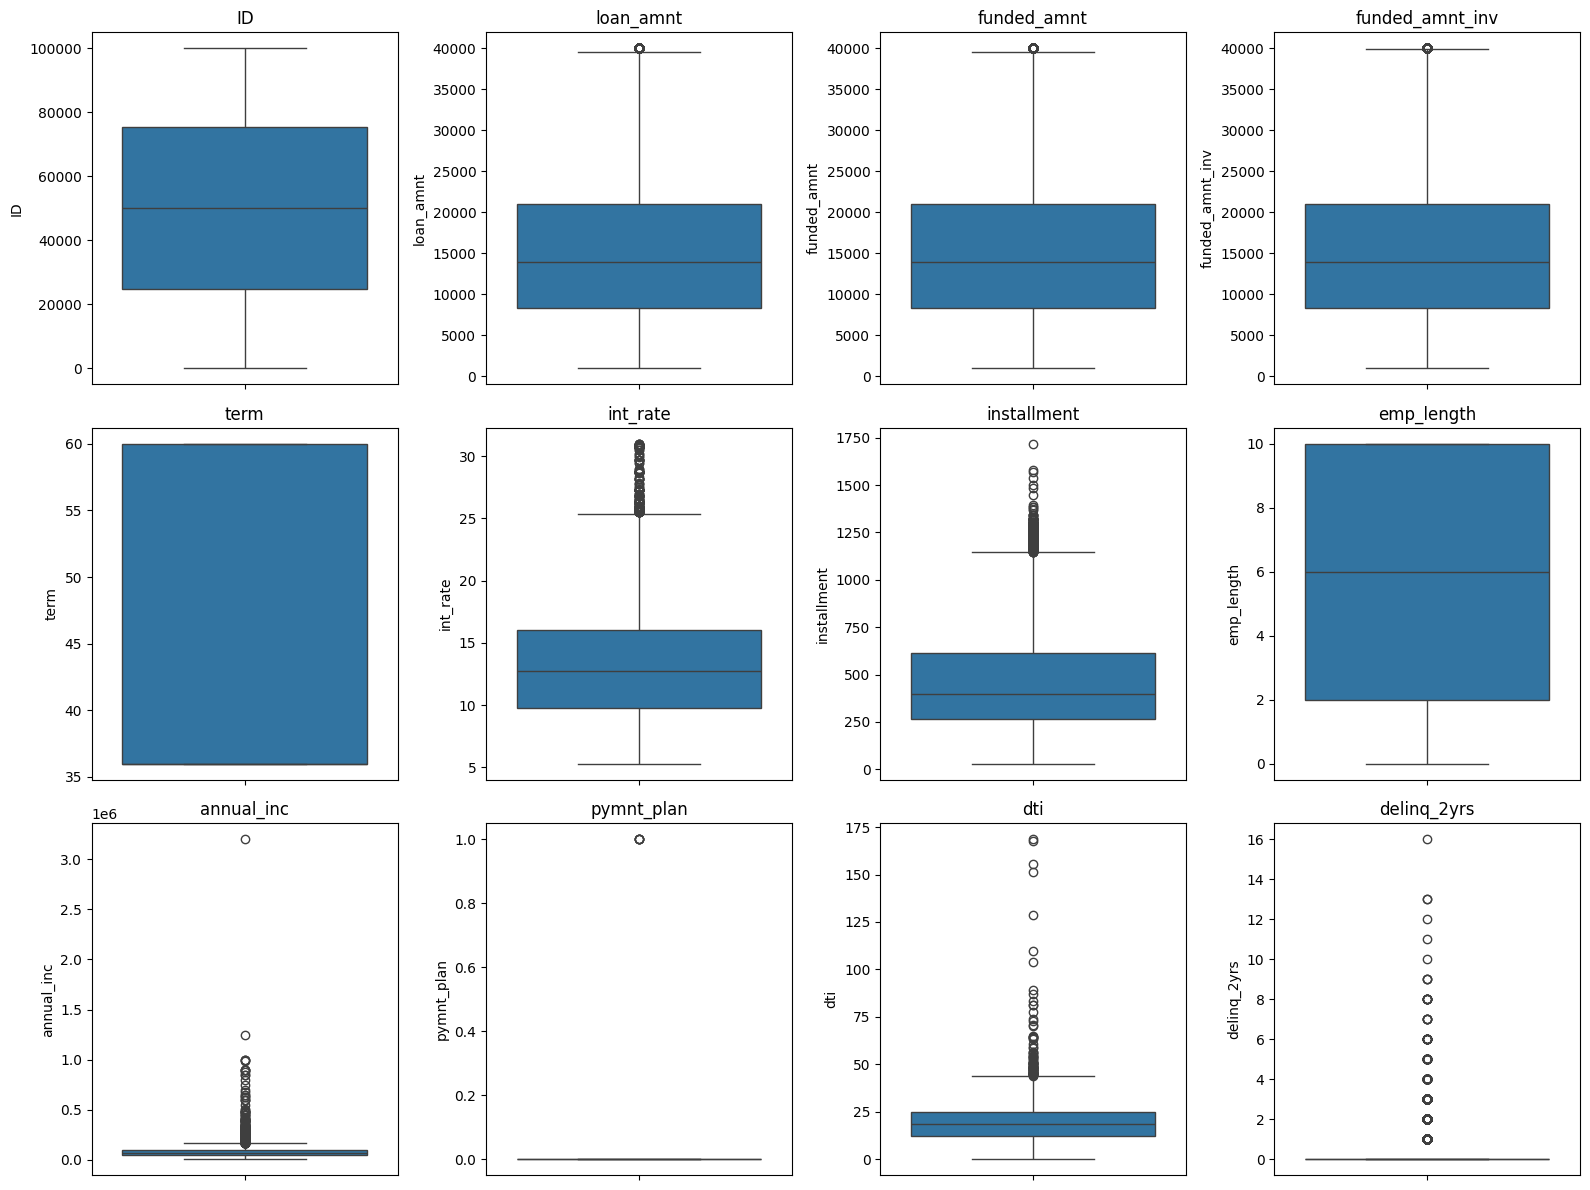

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols[:12]):
    plt.subplot(3, 4, i+1)
    sns.boxplot(y=df_encoded[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Outlier handling

In [90]:
import numpy as np

feature_columns = [c for c in df_encoded.columns if c != 'grade']

df_winsorized = df_encoded.copy()
capped_counts = {}

for col in feature_columns:
    q1 = df_winsorized[col].quantile(0.25)
    q3 = df_winsorized[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    before = df_winsorized[col].values
    after = np.clip(before, lower, upper)
    capped_counts[col] = int(np.sum((before < lower) | (before > upper)))
    df_winsorized[col] = after

print("Total values capped:", int(sum(capped_counts.values())))
# Show top 10 features with most capping
print("Top capped features:")
for k in sorted(capped_counts, key=capped_counts.get, reverse=True)[:10]:
    print(f"  {k}: {capped_counts[k]}")

Total values capped: 56935
Top capped features:
  last_credit_pull_d_month: 2646
  verification_status_Verified: 2500
  num_accts_ever_120_pd: 2437
  purpose_credit_card: 2250
  delinq_2yrs: 1894
  pub_rec: 1585
  tot_coll_amt: 1555
  last_pymnt_amnt: 1357
  addr_state_CA: 1342
  pub_rec_bankruptcies: 1169


## Scaling

In [91]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

df_scaled = df_winsorized.copy()
df_scaled[feature_columns] = robust_scaler.fit_transform(df_winsorized[feature_columns])

print("Scaled features shape:", df_scaled[feature_columns].shape)
df_scaled.head()

ModuleNotFoundError: No module named 'sklearn'